In [19]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_csv('../cleaned_data/kateega.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,0.0,0.802982,9120.0,13.0,0.0,5.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,0.0,0.085113,3042.0,2.0,0.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,0.0,0.024926,12645.5,7.0,0.0,1.0,0.0,0.0


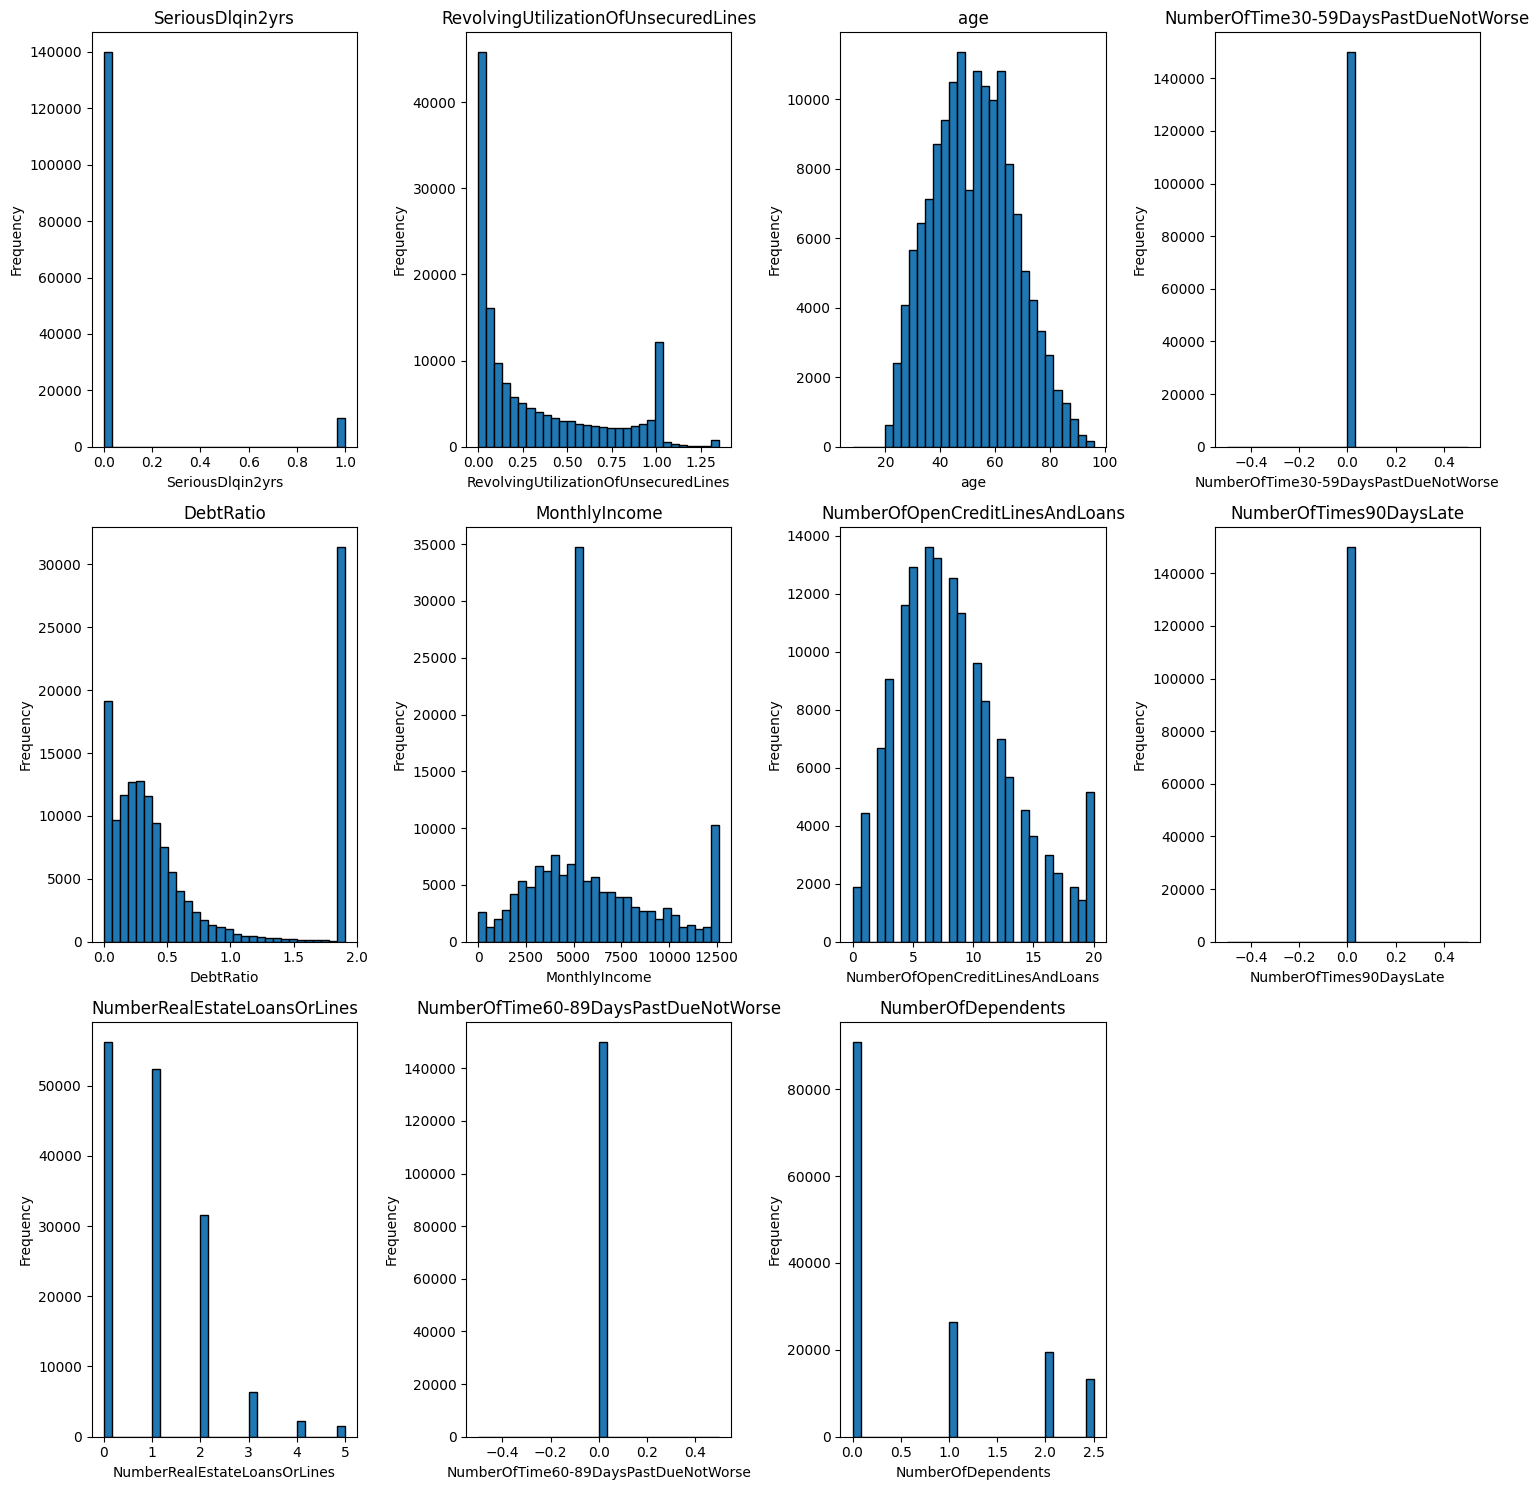

In [10]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate grid dimensions
n_cols = 4
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Create histogram for each feature
for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black')
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### Hypothesis Definition

Null Hypothesis (H₀): There is no difference in default rates between borrowers with real estate loans and borrowers without real estate loans.

Alternative Hypothesis (H₁): Borrowers with real estate loans have a different default rate than borrowers without real estate loans.

In [12]:
df["real_estate_loan"] = (df["NumberRealEstateLoansOrLines"] > 0).astype(int)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,real_estate_loan
0,1,0.766127,45.0,0.0,0.802982,9120.0,13.0,0.0,5.0,0.0,2.0,1
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,0
2,0,0.658180,38.0,0.0,0.085113,3042.0,2.0,0.0,0.0,0.0,0.0,0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,0
4,0,0.907239,49.0,0.0,0.024926,12645.5,7.0,0.0,1.0,0.0,0.0,1


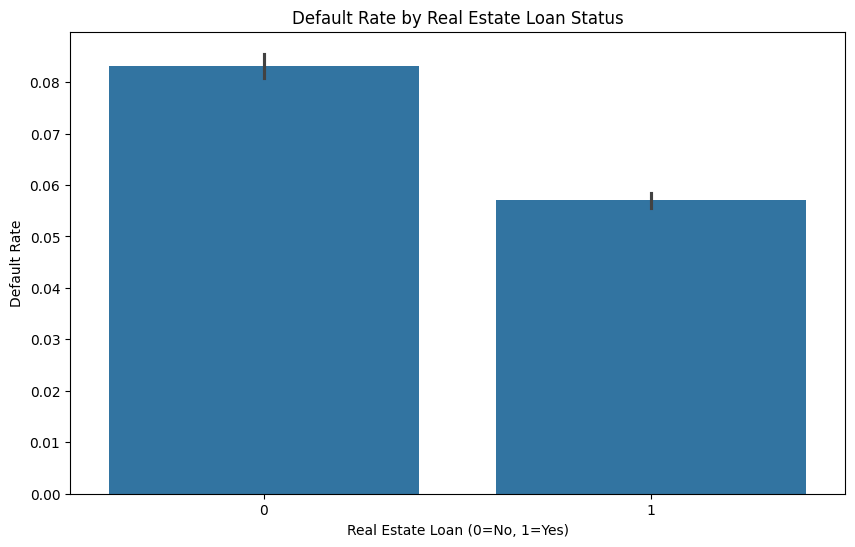

In [18]:
# Check the distribution
# Default rates by real estate loan status
default_by_real_estate = df.groupby('real_estate_loan')['SeriousDlqin2yrs'].agg(['mean', 'count', 'sum'])
default_by_real_estate.columns = ['Default Rate', 'Total Count', 'Number of Defaults']

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='real_estate_loan', y='SeriousDlqin2yrs', errorbar=('ci', 95))
plt.xlabel('Real Estate Loan (0=No, 1=Yes)')
plt.ylabel('Default Rate')
plt.title('Default Rate by Real Estate Loan Status')
plt.show()

In [20]:
# Create contingency table
contingency_table = pd.crosstab(df['real_estate_loan'], df['SeriousDlqin2yrs'])
print("\nContingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print(f"\nResult: Reject null hypothesis (p={p_value:.4f} < {alpha})")
    print("There IS a significant difference in default rates between the two groups.")
else:
    print(f"\nResult: Fail to reject null hypothesis (p={p_value:.4f} >= {alpha})")
    print("There is NO significant difference in default rates between the two groups.")



Contingency Table:
SeriousDlqin2yrs      0     1
real_estate_loan             
0                 51516  4672
1                 88458  5354

Chi-Square Test Results:
Chi-Square Statistic: 382.7254
P-value: 0.0000
Degrees of Freedom: 1

Result: Reject null hypothesis (p=0.0000 < 0.05)
There IS a significant difference in default rates between the two groups.
